# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [1]:
#print(weather_api_key)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#creating empty lists
city_id = []
city_name = []
cloudiness = []
temperature = []
lat = []
long = []
humidity = []
wind_speed = []
max_temperature = []


idx = 0

for city in cities:
    #print(city)
    
    response = requests.get(query_url+city).json()
    pprint(response)
    try:
        #print(response["name"])
        city_id.append(response["id"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        temperature.append(response["main"]["temp"])
        max_temperature.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        print(f"City Name: {response['name']}, City ID: {response['id']}")
        #print(city_id_list)
        #print(city_name_list)
    except KeyError:
        print(f"The city {city} not found.")
    
    idx = idx+1
    if idx ==2:
        break;

{'base': 'stations',
 'clouds': {'all': 43},
 'cod': 200,
 'coord': {'lat': -33.5906, 'lon': 26.891},
 'dt': 1627266487,
 'id': 964432,
 'main': {'feels_like': 56.88,
          'grnd_level': 1023,
          'humidity': 31,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': 59.74,
          'temp_max': 59.74,
          'temp_min': 59.74},
 'name': 'Port Alfred',
 'sys': {'country': 'ZA', 'sunrise': 1627276116, 'sunset': 1627313342},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 343, 'gust': 22.84, 'speed': 11.9}}
City Name: Port Alfred, City ID: 964432
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -21.2, 'lon': -175.2},
 'dt': 1627266485,
 'id': 4032243,
 'main': {'feels_like': 86.43,
          'humidity': 83,
          'pressure': 1014,
          'temp': 80.76,
          'temp_max': 80.

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
city_df = pd.DataFrame({"Name": city_name,
                       "ID": city_id,
                       "Cloudiness": cloudiness,
                       "Temperature": temperature, "Max Temperature": max_temperature,
                       "Latitude": lat,
                       "Longitude": long,
                       "Humidity": humidity,
                       "Wind Speed": wind_speed})

city_df.to_csv(output_data_file, header=True, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
#  Get the indices of cities that have humidity over 100%.
humidity_indices = city_df.index[city_df['Humidity'] <= 100].tolist()
humidity_indices


[0, 1]

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [33]:
city_clean_df = city_df.drop(humidity_indices)
city_clean_df.head()

,Name,ID,Cloudiness,Temperature,Max Temperature,Latitude,Longitude,Humidity,Wind Speed


In [34]:
#verify the original data not touched
city_df.head()

,Name,ID,Cloudiness,Temperature,Max Temperature,Latitude,Longitude,Humidity,Wind Speed
0,Port Alfred,964432,43,59.74,59.74,-33.5906,26.891,31,11.90
1,Vaini,4032243,20,80.76,80.76,-21.2000,-175.200,83,9.22


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

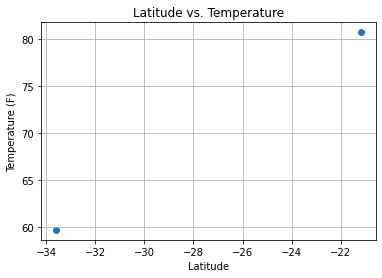

In [35]:
plt.scatter(city_df["Latitude"], city_df["Temperature"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
#plt.savefig("../WeatherPy/City Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

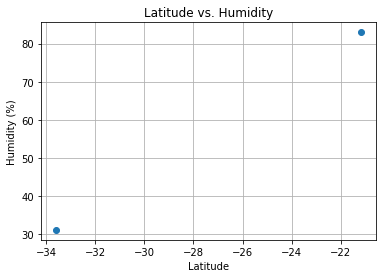

In [36]:
plt.scatter(city_df["Latitude"], city_df["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.savefig("../WeatherPy/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

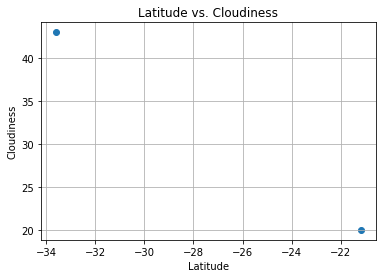

In [37]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
#plt.savefig("../WeatherPy/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

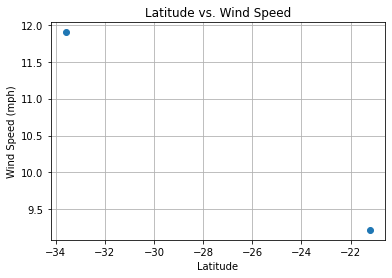

In [38]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.savefig("../WeatherPy/City Latitude vs Wind Speed.png")

## Linear Regression

In [39]:
nor = city_df['Latitude'] >=0
sou = city_df['Latitude'] <0
nor_hemis = city_df[nor]
#nor_hemis.head()
sou_hemis = city_df[sou]
#sou_hemis.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [51]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Temperature vs Latitude at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

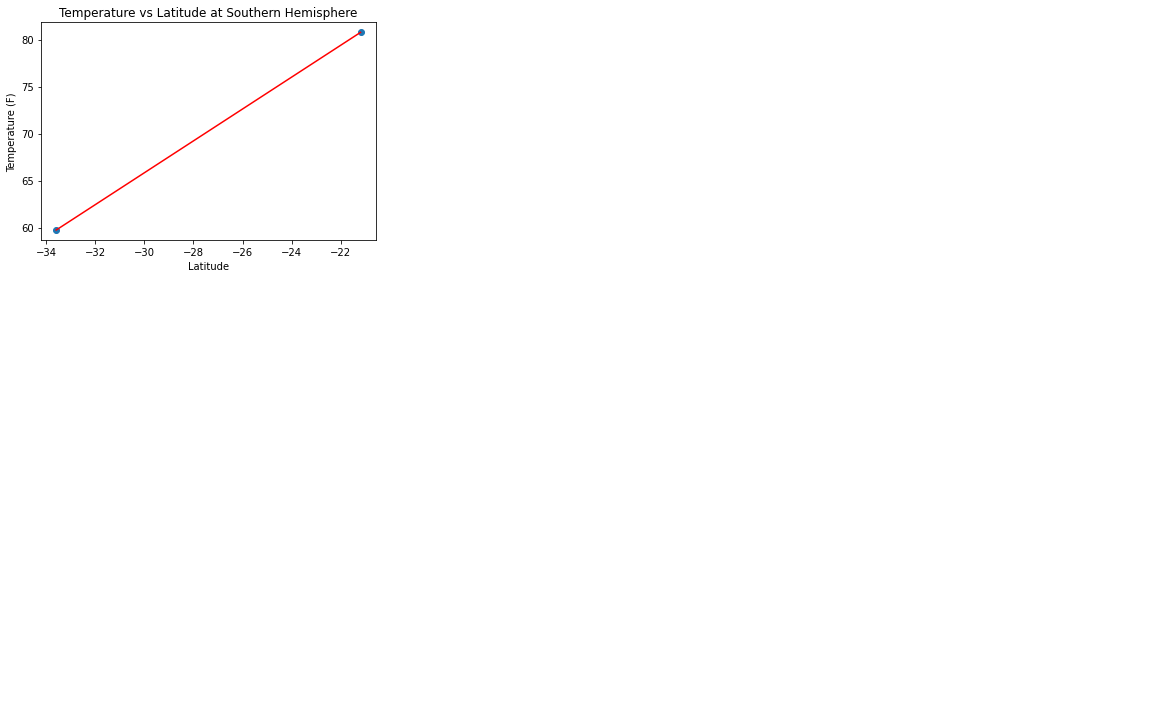

In [50]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Temperature vs Latitude at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [52]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Humidity vs Latitude at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

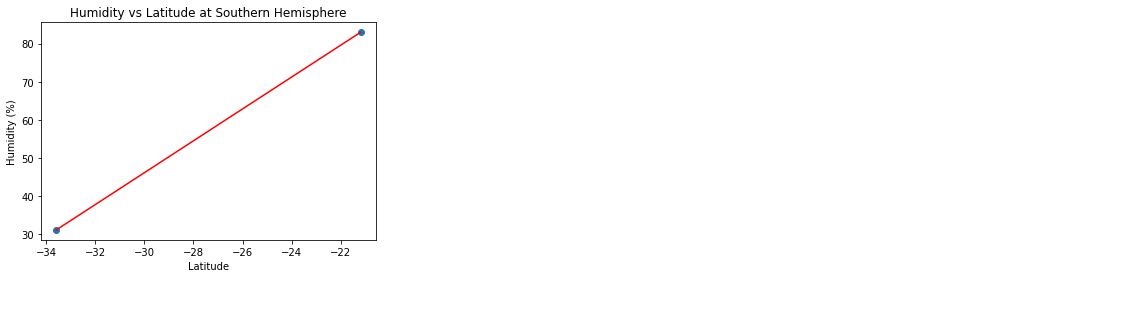

In [53]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Humidity vs Latitude at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [54]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Cloudiness vs Latitude at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

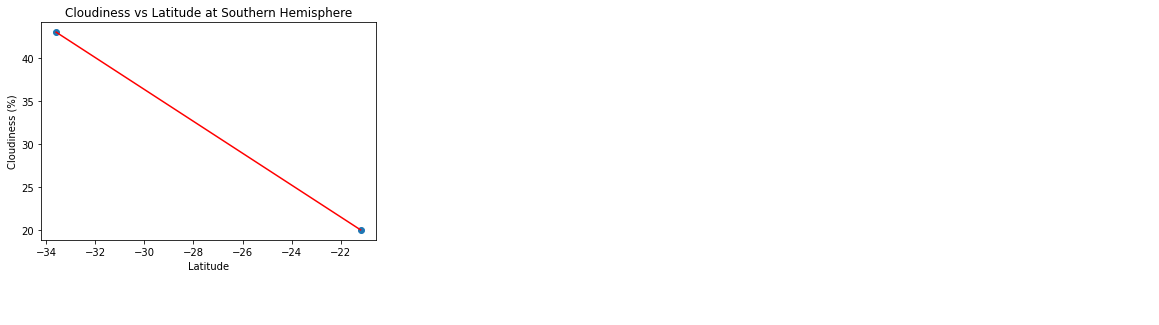

In [55]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Cloudiness vs Latitude at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [56]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Wind Speed vs Latitude at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

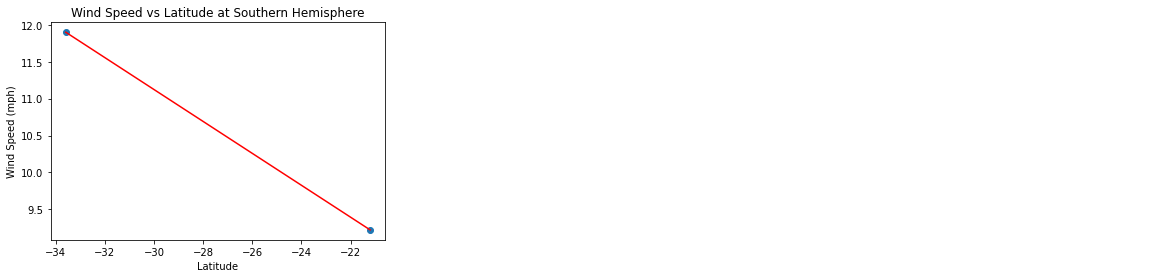

In [57]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Wind Speed vs Latitude at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()